# Import Libraries

In [9]:
import yt
import unyt

import caesar
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

import os

# Load snapshot with yt and halo/galaxy information with caesar

In [4]:
snap_file = '/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_272.hdf5'
snap = yt.load(snap_file)

yt : [INFO     ] 2026-01-12 16:17:59,506 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2026-01-12 16:17:59,521 Calculating time from 3.300e-01 to be 1.023e+17 seconds
yt : [INFO     ] 2026-01-12 16:17:59,525 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2026-01-12 16:17:59,624 Parameters: current_time              = 1.0227818617886227e+17 s
yt : [INFO     ] 2026-01-12 16:17:59,625 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2026-01-12 16:17:59,627 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2026-01-12 16:17:59,627 Parameters: domain_right_edge         = [1000000. 1000000. 1000000.]
yt : [INFO     ] 2026-01-12 16:17:59,628 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2026-01-12 16:17:59,630 Parameters: current_redshift          = 2.030303030303029
yt : [INFO     ] 2026-01-12 16:17:59,630 Parameters: omega_lambda              = 0.692
yt : [INFO     ] 2026-01-12 16:17:59,631

In [5]:
caesar_file = '/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_272.hdf5'
obj = caesar.load(caesar_file)

yt : [INFO     ] 2026-01-12 16:18:58,336 Opening /scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_272.hdf5
yt : [INFO     ] 2026-01-12 16:18:58,414 Found 25691 halos
yt : [INFO     ] 2026-01-12 16:18:58,461 Found 2055 galaxies


## Snapshot properties

In [25]:
age = snap.current_time.in_units('Gyr')

In [26]:
age

unyt_quantity(3.24100015, 'Gyr')

In [29]:
z = snap.current_redshift

In [30]:
z

np.float64(2.030303030303029)

## Particle data

In [8]:
data = snap.all_data()

yt : [INFO     ] 2026-01-12 16:23:10,384 Allocating for 8.386e+07 particles
Initializing refined index: 100%|██████████| 126/126 [00:31<00:00,  4.01it/s]


## Get target halo

In [6]:
halo_id = 0

In [7]:
halo = obj.halos[halo_id]

## Get relevant target halo properties

In [10]:
halo_props = {
    'minpotpos':halo.minpotpos,
    'r200c':halo.virial_quantities['r200c'],
}

# Calculate radii of particles relative to halo centre

In [11]:
gas_pos = data[('PartType0', 'Coordinates')]

In [12]:
gas_pos -= halo_props['minpotpos']

In [13]:
gas_radii = snap.arr(np.linalg.norm(gas_pos, axis=1), gas_pos.units)

In [14]:
gas_radii

unyt_array([ 5867.77523014,  5836.47981347,  5921.71508843, ...,
       21111.35471873, 21024.17526289, 21131.68502324], shape=(31991342,), units='code_length')

In [55]:
gas_radii_r200c = gas_radii/halo_props['r200c']

# Get particles in/around halo

In [56]:
halo_filter = np.where(gas_radii_r200c <= 10, True, False)

In [57]:
wind_filter = np.where(data[('PartType0', 'DelayTime')]==0, True, False)

# Get gas particle properties

In [18]:
# halo_gas_radii_scaled = gas_radii_scaled[halo_filter]

In [19]:
# halo_gas_temp = data[('PartType0', 'temperature')][halo_filter]

In [50]:
gas_temp = data[('PartType0', 'temperature')]

# Plot halo gas particle properties

Text(0.5, 1.0, 'Manhattan Suite L0 - Halo 0 (z=2.03)')

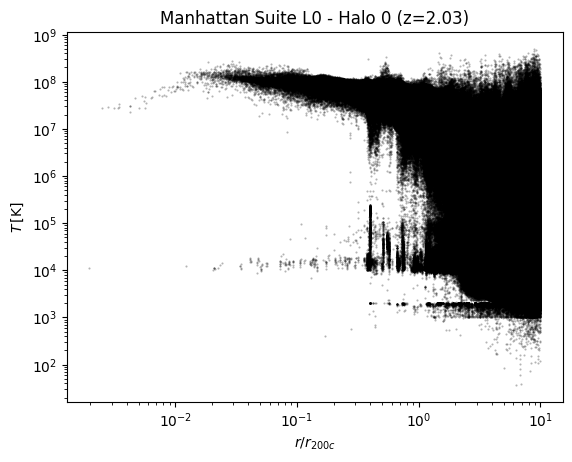

In [58]:
plt.plot(gas_radii_scaled[halo_filter], gas_temp[halo_filter], color='black', marker='o', ms=0.5, alpha=0.3, ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/r_{200c}$')
plt.ylabel(r'$T\,[\mathrm{K}]$')
plt.title(f'Manhattan Suite L0 - Halo 0 (z={z:.2f})')

Text(0.5, 1.0, 'Manhattan Suite L0 - Halo 0 (z=2.03)')

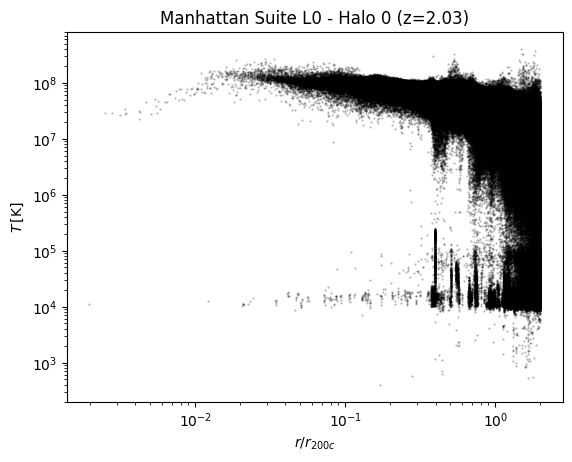

In [52]:
plt.plot(gas_radii_scaled[halo_filter & wind_filter], gas_temp[halo_filter & wind_filter], color='black', marker='o', ms=0.5, alpha=0.3, ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r/r_{200c}$')
plt.ylabel(r'$T\,[\mathrm{K}]$')
plt.title(f'Manhattan Suite L0 - Halo 0 (z={z:.2f})')

Text(0.5, 1.0, 'Manhattan Suite L0 - Halo 0 (z=2.03)')

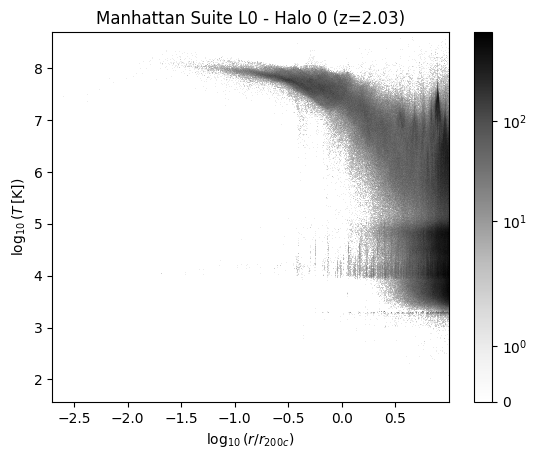

In [59]:
plt.hist2d(np.log10(gas_radii_scaled[halo_filter]), np.log10(gas_temp[halo_filter]), bins=1000, cmap='Greys', norm='symlog')
plt.colorbar()
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\log_{10}{(r/r_{200c})}$')
plt.ylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$')
plt.title(f'Manhattan Suite L0 - Halo 0 (z={z:.2f})')

Text(0.5, 1.0, 'Manhattan Suite L0 - Halo 0 (z=2.03)')

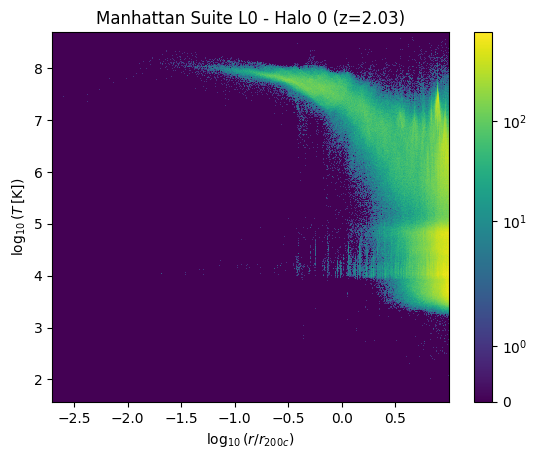

In [61]:
plt.hist2d(np.log10(gas_radii_scaled[halo_filter & wind_filter]), np.log10(gas_temp[halo_filter & wind_filter]), bins=1000, cmap='viridis', norm='symlog')
plt.colorbar()
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\log_{10}{(r/r_{200c})}$')
plt.ylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$')
plt.title(f'Manhattan Suite L0 - Halo 0 (z={z:.2f})')

Text(0.5, 1.0, 'Manhattan Suite L0 - Halo 0 (z=2.03)')

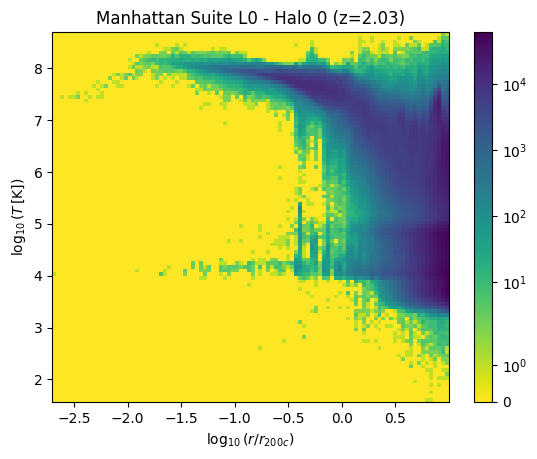

In [62]:
plt.hist2d(np.log10(gas_radii_scaled[halo_filter & wind_filter]), np.log10(gas_temp[halo_filter & wind_filter]), bins=100, cmap='viridis_r', norm='symlog')
plt.colorbar()
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\log_{10}{(r/r_{200c})}$')
plt.ylabel(r'$\log_{10}{(T\,[\mathrm{K}])}$')
plt.title(f'Manhattan Suite L0 - Halo 0 (z={z:.2f})')